In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

In [2]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# загрузим датасет
from sklearn.datasets import fetch_covtype
df = fetch_covtype()

In [4]:
#загрузим признаки
features = df.data

In [5]:
columns = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

In [6]:
data = pd.DataFrame(features, columns = columns)

In [7]:
#загрузим целевую переменную
data['Cover_Type'] = df.target

In [8]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [9]:
# посмотрим тип данных и пропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area1                    581012 non-null  float64
 11  Wilderness_Area2          

In [10]:
RANDOM_STATE = 7
N_FOLDS = 10

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Cover_Type',axis=1), data['Cover_Type'], random_state=RANDOM_STATE, test_size=0.2, )

In [12]:
# обучим случайный лес на всех признаках
model_rf = RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [13]:
score_total = np.mean(-cross_val_score(model_rf,X_test,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))
print('MSE:', score_total)

MSE: 0.5673345533458373


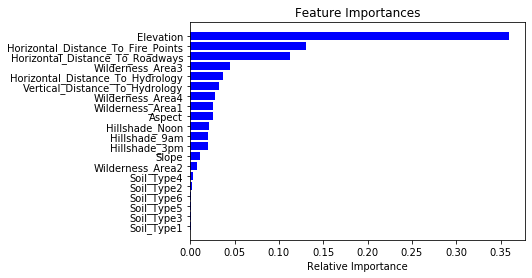

In [14]:
features = X_train.columns
importances = model_rf.feature_importances_[0:20]

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Посмотрим важность признаков на основе деревья решений

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
# извлечение признаков
model = ExtraTreesClassifier()
model.fit(data.drop('Cover_Type',axis=1), data['Cover_Type']) # обучение
for i in range(len(columns)):
    print(f"{columns[i]}\t- {model.feature_importances_[i]:.4f}")

Elevation	- 0.1951
Aspect	- 0.0516
Slope	- 0.0367
Horizontal_Distance_To_Hydrology	- 0.0643
Vertical_Distance_To_Hydrology	- 0.0591
Horizontal_Distance_To_Roadways	- 0.1106
Hillshade_9am	- 0.0430
Hillshade_Noon	- 0.0458
Hillshade_3pm	- 0.0429
Horizontal_Distance_To_Fire_Points	- 0.1053
Wilderness_Area1	- 0.0108
Wilderness_Area2	- 0.0066
Wilderness_Area3	- 0.0112
Wilderness_Area4	- 0.0419
Soil_Type1	- 0.0014
Soil_Type2	- 0.0104
Soil_Type3	- 0.0029
Soil_Type4	- 0.0143
Soil_Type5	- 0.0006
Soil_Type6	- 0.0028
Soil_Type7	- 0.0001
Soil_Type8	- 0.0001
Soil_Type9	- 0.0002
Soil_Type10	- 0.0114
Soil_Type11	- 0.0037
Soil_Type12	- 0.0148
Soil_Type13	- 0.0053
Soil_Type14	- 0.0006
Soil_Type15	- 0.0000
Soil_Type16	- 0.0009
Soil_Type17	- 0.0020
Soil_Type18	- 0.0005
Soil_Type19	- 0.0012
Soil_Type20	- 0.0021
Soil_Type21	- 0.0013
Soil_Type22	- 0.0195
Soil_Type23	- 0.0125
Soil_Type24	- 0.0043
Soil_Type25	- 0.0003
Soil_Type26	- 0.0009
Soil_Type27	- 0.0008
Soil_Type28	- 0.0004
Soil_Type29	- 0.0050
Soil_Type

Посмотрим корреляцию признаков

In [17]:
corr = data.corr()
# Корреляция с целевой переменной
cor_target = abs(corr["Cover_Type"])

# Выбор наиболее коррелированных функций
relevant_features = cor_target[cor_target>=0.2]
relevant_features

Elevation           0.269554
Wilderness_Area1    0.203913
Wilderness_Area4    0.323200
Soil_Type10         0.243876
Cover_Type          1.000000
Name: Cover_Type, dtype: float64

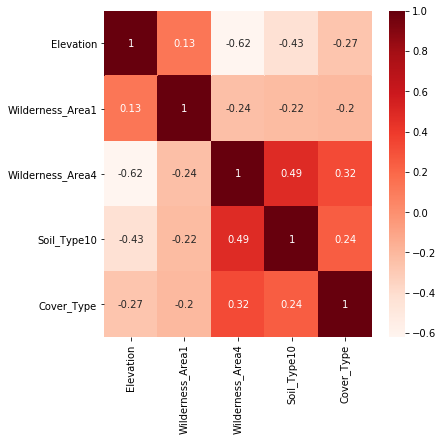

In [18]:
plt.figure(figsize=(6,6))
corr_1 = data[relevant_features.index].corr()
sns.heatmap(corr_1, annot=True, cmap=plt.cm.Reds)
plt.show();

Wilderness_Area4, Soil_Type10 и Elevation показывают достаточно высокую корреляцию, можно попробовать обучить модель только на Wilderness_Area4

Посмотрим важность признаков с точки зрения методов L1-регуляризации

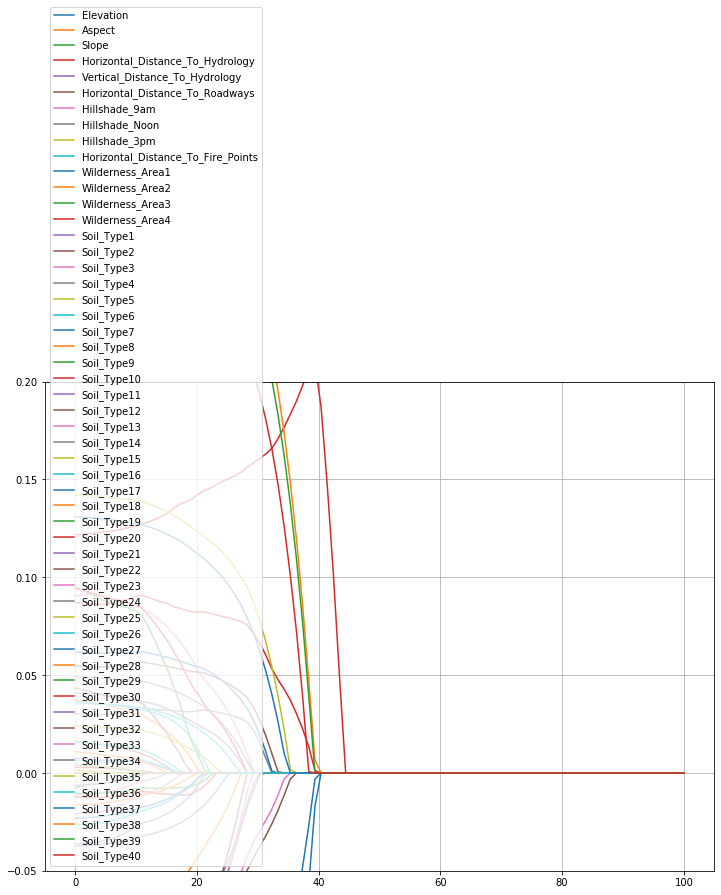

In [19]:
from sklearn.linear_model import  Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_sc = StandardScaler().fit_transform(data.drop('Cover_Type',axis=1)) # преобразование данных
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_sc, data['Cover_Type'])
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(12,9))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.2)  
plt.legend(columns)      
plt.grid()

Посмотрим важность признаков с точки зрения метода Information value

In [20]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [21]:
final_iv, IV = data_vars(data.drop('Cover_Type',axis=1), data['Cover_Type'])

In [22]:
final_iv.head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Elevation,1859.0,2996.0,291012,681511,2.341866,-390499,-1.341866,0.571771,0.639201,-0.111480,0.019070
1,Elevation,2997.0,3858.0,290000,510418,1.760062,-220418,-0.760062,0.428229,0.360799,0.171337,0.019070
2,Aspect,0.0,127.0,291288,592401,2.033730,-301113,-1.033730,0.497010,0.492887,0.008331,0.000068
3,Aspect,128.0,360.0,289724,599528,2.069307,-309804,-1.069307,0.502990,0.507113,-0.008164,0.000068
4,Slope,0.0,4.0,40026,74110,1.851546,-34084,-0.851546,0.062177,0.055792,0.108355,0.008234


In [23]:
IV.sort_values('IV')

,VAR_NAME,IV
27,Soil_Type26,5.922402e-08
46,Soil_Type7,1.068753e-07
29,Soil_Type28,1.268434e-06
15,Soil_Type15,4.594038e-06
47,Soil_Type8,7.148760e-06
36,Soil_Type34,8.304029e-06
3,Hillshade_9am,8.567548e-06
48,Soil_Type9,1.816033e-05
18,Soil_Type18,2.028328e-05
26,Soil_Type25,2.260561e-05


### Обучим на 1 признаке

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data[['Elevation']], data['Cover_Type'], random_state=RANDOM_STATE, test_size=0.2, )

In [25]:
# обучим случайный лес на самом важном признаке
model_rf = RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [26]:
score_1 = np.mean(-cross_val_score(model_rf,X_test,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))
print('MSE:', score_1)

MSE: 1.4062867535424552


### Обучим на 2 признаках

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data[['Soil_Type22', 'Wilderness_Area4']], data['Cover_Type'], random_state=RANDOM_STATE, test_size=0.2, )

In [28]:
# обучим случайный лес на самых важных признаках по information value
model_rf = RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [29]:
score_2 = np.mean(-cross_val_score(model_rf,X_test,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))
print('MSE:', score_2)

MSE: 1.7278565242663604


### Обучим на 3 признаках

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data[['Elevation', 'Aspect', 'Slope']], data['Cover_Type'], random_state=RANDOM_STATE, test_size=0.2, )

In [31]:
# обучим случайный лес на 3 самых важных признаках по Lacco и деревьям решений
model_rf = RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [32]:
score_3 = np.mean(-cross_val_score(model_rf,X_test,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))
print('MSE:', score_3)

MSE: 1.2629071045214186


### Обучим на 5 признаках

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']], data['Cover_Type'], random_state=RANDOM_STATE, test_size=0.2, )

In [34]:
# обучим случайный лес на 5 самых важных признаках по Lacco и деревьям решений
model_rf = RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [35]:
score_5 = np.mean(-cross_val_score(model_rf,X_test,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))
print('MSE:', score_5)

MSE: 1.0555029295110532


### Обучим на 10 признаках

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Hillshade_9am', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']], data['Cover_Type'], random_state=RANDOM_STATE, test_size=0.2, )

In [40]:
# обучим случайный лес на 10 самых важных признаках по Lacco и деревьям решений
model_rf = RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [41]:
score_10 = np.mean(-cross_val_score(model_rf,X_test,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))
print('MSE:', score_10)

MSE: 0.6738107809530959


### Построим график зависимости MSE от количества признаков

In [42]:
score = [score_1, score_2, score_3, score_5, score_10, score_total]
score

[1.4062867535424552,
 1.7278565242663604,
 1.2629071045214186,
 1.0555029295110532,
 0.6738107809530959,
 0.5673345533458373]

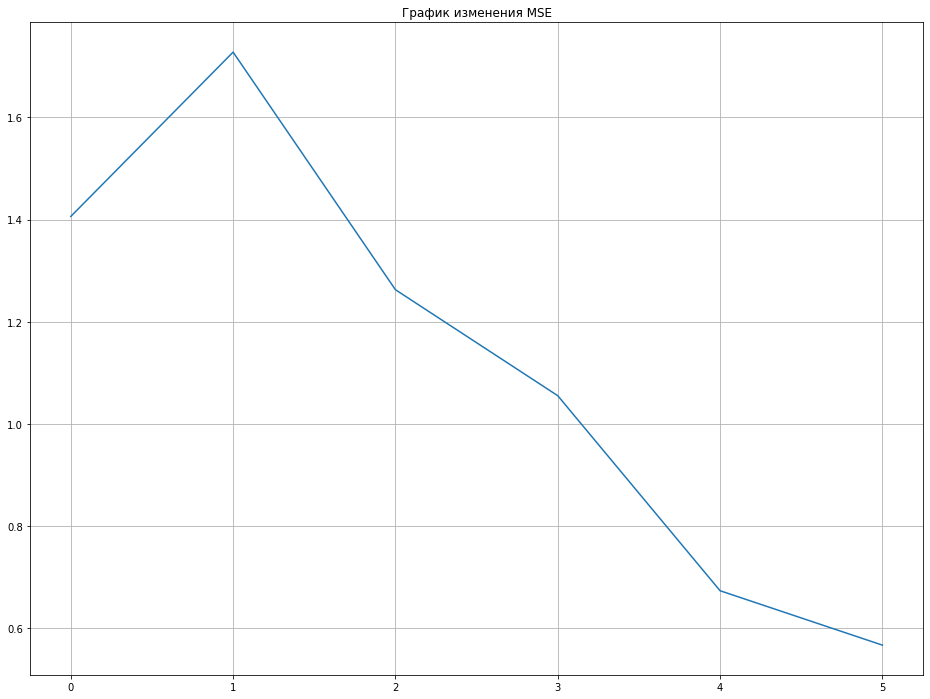

In [43]:
plt.figure(figsize=(16,12))
plt.plot(score)
plt.title('График изменения MSE')
plt.grid()
plt.show();

С увеличение количества признаков MSE снижается и уже на 10 признаках примерно равен показателю на 60 признаках